### Table of Contents:
* [1. Preparing the Data](#1)
* &emsp;[1.1. Importing Libraries](#11)
* [2. Data Cleaning](#2)
* &emsp;[2.1. Identifying Missing Values](#21)
* &emsp;[2.2. Dealing with Missing Values](#22)
* &emsp;[2.3. Removing Rows](#23)
* &emsp;[2.4. Finding Outliers](#24)
* &emsp;&emsp;[2.4.1. IQR Score Method](#241)
* &emsp;[2.5. Box Plot](#25)
* [3. Data Transformation](#3)
* &emsp;[3.1. Binning](#31)
* &emsp;[3.2. Normalization](#32)
* &emsp;&emsp;[3.2.1. Z-score Method](#33)
* [4. Results](#4)
* &emsp;[4.1. Data Cleaning](#41)
* &emsp;[4.2. Data Transformation](#42)

# 1. Preparing the Data <a class="anchor" id="1"></a>

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [51]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline  
plt.style.use('fivethirtyeight')

# 2. Data Cleaning <a class="anchor" id="2"></a>

## 2.1. Identifying Missing Values <a class="anchor" id="21"></a>

In [52]:
df = pd.read_csv('data/raw_training_data.csv')

In [53]:
categorical_features = ['company','country','director','genre','released','year',
                        'writer','original_title','tagline','title','genres_edited','production_countries_edited',]
continuous_features = ['budget','runtime','votes','popularity']
target_features = ['isprofit','profitability_ratio']

In [54]:
df.shape # (# rows, # cols)

(3524, 25)

In [55]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,company,country,director,genre,gross,name,released,runtime,...,profitability_ratio_bucket,id,imdb_id,original_title,popularity,tagline,title,genres_edited,production_countries_edited,year_released
0,0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,22.08.1986 00:00,89,...,550,235,tt0092005,Stand by Me,15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",US,1986
1,1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,11.06.1986 00:00,103,...,1070,9377,tt0091042,Ferris Bueller's Day Off,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,US,1986
2,2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,16.05.1986 00:00,110,...,1100,744,tt0092099,Top Gun,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",US,1986
3,3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,18.07.1986 00:00,137,...,360,679,tt0090605,Aliens,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction","GB, US",1986
4,4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,1.08.1986 00:00,90,...,110,10122,tt0091059,Flight of the Navigator,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",US,1986


In [56]:
del df['Unnamed: 0']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   country                      3524 non-null   object 
 3   director                     3524 non-null   object 
 4   genre                        3524 non-null   object 
 5   gross                        3524 non-null   int64  
 6   name                         3524 non-null   object 
 7   released                     3524 non-null   object 
 8   runtime                      3524 non-null   int64  
 9   votes                        3524 non-null   int64  
 10  writer                       3524 non-null   object 
 11  year                         3524 non-null   int64  
 12  isprofit                     3524 non-null   int64  
 13  profitability_rati

In [58]:
df.isnull().sum()

budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
released                         0
runtime                          0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
id                               0
imdb_id                          0
original_title                   0
popularity                       0
tagline                        371
title                            0
genres_edited                    0
production_countries_edited     31
year_released                    0
dtype: int64

In [59]:
df.describe()   # before replacing zero with None

,budget,gross,runtime,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.2. Dealing with Missing Values <a class="anchor" id="22"></a>

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features do not have to change since they do not contain zero values.

In [40]:
#df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
#df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
#df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [41]:
df.head()   # take a peak at the dataset

,budget,company,country,director,genre,gross,name,released,runtime,votes,...,profitability_ratio_bucket,id,imdb_id,original_title,popularity,tagline,title,genres_edited,production_countries_edited,year_released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,22.08.1986 00:00,89,299174,...,550,235,tt0092005,Stand by Me,15.206957,"For some, it's the last real taste of innocenc...",Stand by Me,"Crime, Drama",US,1986
1,6000000,Paramount Pictures,USA,Other,Comedy,70136369,Ferris Bueller's Day Off,11.06.1986 00:00,103,264740,...,1070,9377,tt0091042,Ferris Bueller's Day Off,12.724645,One man's struggle to take it easy.,Ferris Bueller's Day Off,Comedy,US,1986
2,15000000,Paramount Pictures,USA,Other,Action,179800601,Top Gun,16.05.1986 00:00,110,236909,...,1100,744,tt0092099,Top Gun,20.301019,Up there with the best of the best.,Top Gun,"Action, Romance, War",US,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,Other,Action,85160248,Aliens,18.07.1986 00:00,137,540152,...,360,679,tt0090605,Aliens,21.761179,This Time It's War,Aliens,"Horror, Action, Thriller, Science Fiction","GB, US",1986
4,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,1.08.1986 00:00,90,36636,...,110,10122,tt0091059,Flight of the Navigator,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",US,1986


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3524 non-null   int64  
 1   company                      3524 non-null   object 
 2   country                      3524 non-null   object 
 3   director                     3524 non-null   object 
 4   genre                        3524 non-null   object 
 5   gross                        3524 non-null   int64  
 6   name                         3524 non-null   object 
 7   released                     3524 non-null   object 
 8   runtime                      3524 non-null   int64  
 9   votes                        3524 non-null   int64  
 10  writer                       3524 non-null   object 
 11  year                         3524 non-null   int64  
 12  isprofit                     3524 non-null   int64  
 13  profitability_rati

In [43]:
df.isnull().sum()

budget                           0
company                          0
country                          0
director                         0
genre                            0
gross                            0
name                             0
released                         0
runtime                          0
votes                            0
writer                           0
year                             0
isprofit                         0
profitability_ratio              0
profitability_ratio_bucket       0
id                               0
imdb_id                          0
original_title                   0
popularity                       0
tagline                        371
title                            0
genres_edited                    0
production_countries_edited     31
year_released                    0
dtype: int64

In [44]:
df.describe()   # after replacing zero with None

,budget,gross,runtime,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.3. Removing Rows <a class="anchor" id="23"></a>

In [60]:
data_dropped = df.dropna(axis=0)
data_dropped.shape

(3136, 24)

In [61]:
data_dropped = data_dropped.reset_index() 
del data_dropped['index']

In [62]:
data_dropped.shape

(3136, 24)

In [69]:
df.shape

(3524, 24)

In [70]:
num_rows_lost = (100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))
num_rows_lost

11.010215664018162

In [71]:
template = 'retained {}% of rows'
print(template)
template.format(num_rows_lost)
print(template)

retained {}% of rows
retained {}% of rows


In [72]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    1485
1    1651
dtype: int64

In [73]:
class_counts[0]/df['isprofit'].size

0.4213961407491487

In [74]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [75]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.526467
0    0.473533
Name: isprofit, dtype: float64

In [76]:
data_dropped.describe()   # after removing rows which include NaN

,budget,gross,runtime,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.136000e+03,3.136000e+03,3136.000000,3.136000e+03,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,3.859966e+07,5.140497e+07,107.340561,1.073402e+05,1996.713329,0.526467,4.405641,440.518495,44533.575255,10.205283,2002.584821
std,4.168162e+07,6.928857e+07,18.487155,1.623381e+05,107.462775,0.499379,135.536262,13553.649593,76072.815446,13.920346,8.389510
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.100000e+07,8.998127e+06,96.000000,1.859850e+04,1996.000000,0.000000,-0.504688,-50.000000,8487.750000,6.142214,1996.000000
50%,2.500000e+07,2.862322e+07,104.000000,5.132950e+04,2003.000000,1.000000,0.064458,10.000000,11933.000000,8.777836,2003.000000
75%,5.000000e+07,6.571659e+07,117.000000,1.256960e+05,2010.000000,1.000000,1.069474,110.000000,40127.500000,11.930611,2010.000000
max,3.000000e+08,9.366622e+08,219.000000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


In [77]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

budget                         5.84
gross                          7.71
runtime                        0.14
votes                          8.12
year                          -0.02
isprofit                       3.13
profitability_ratio           10.23
profitability_ratio_bucket    10.24
id                            -2.00
popularity                     4.29
year_released                  0.01
dtype: float64

### Bar Chart of the Change in Means

Text(0, 0.5, '% change')

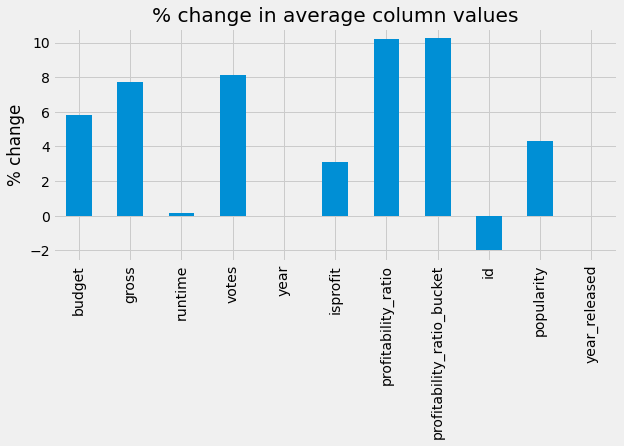

In [79]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 2.4. Finding Outliers <a class="anchor" id="24"></a>

### 2.4.1. IQR Score Method <a class="anchor" id="241"></a>

In [80]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                        3.900000e+07
gross                         5.671846e+07
runtime                       2.100000e+01
votes                         1.070975e+05
year                          1.400000e+01
isprofit                      1.000000e+00
profitability_ratio           1.574162e+00
profitability_ratio_bucket    1.600000e+02
id                            3.163975e+04
popularity                    5.788397e+00
year_released                 1.400000e+01
dtype: float64


In [81]:
print((data_dropped < (Q1 - (1.5 * IQR))) | (data_dropped > (Q3 + (1.5 * IQR))))

      budget  company  country  director  genre  genres_edited  gross     id  \
0      False    False    False     False  False          False  False  False   
1      False    False    False     False  False          False  False  False   
2      False    False    False     False  False          False   True  False   
3      False    False    False     False  False          False  False  False   
4      False    False    False     False  False          False  False  False   
...      ...      ...      ...       ...    ...            ...    ...    ...   
3131   False    False    False     False  False          False  False   True   
3132   False    False    False     False  False          False  False   True   
3133   False    False    False     False  False          False  False   True   
3134   False    False    False     False  False          False  False   True   
3135   False    False    False     False  False          False  False   True   

      imdb_id  isprofit  ...  profitabi

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [82]:
data_dropped.shape

(3136, 24)

In [83]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [84]:
data_dropped_outlier_IQR.shape

(2128, 24)

In [85]:
data_dropped_outlier_IQR = data_dropped_outlier_IQR.reset_index()
del data_dropped_outlier_IQR['index']
data_dropped_outlier_IQR

,budget,company,country,director,genre,gross,name,released,runtime,votes,...,profitability_ratio_bucket,id,imdb_id,original_title,popularity,tagline,title,genres_edited,production_countries_edited,year_released
0,9000000,Walt Disney Pictures,USA,Other,Adventure,18564613,Flight of the Navigator,1.08.1986 00:00,90,36636,...,110,10122,tt0091059,Flight of the Navigator,5.526865,Come along on the greatest adventure of the su...,Flight of the Navigator,"Family, Science Fiction, Adventure",US,1986
1,6000000,Other,USA,Other,Drama,8551228,Blue Velvet,23.10.1986 00:00,120,146768,...,40,793,tt0090756,Blue Velvet,7.882247,It's a strange world.,Blue Velvet,"Crime, Drama, Mystery, Thriller",US,1986
2,16000000,Other,Other,Other,Action,5900000,Highlander,7.03.1986 00:00,116,104860,...,-60,8009,tt0091203,Highlander,16.870392,There can be only one.,Highlander,"Adventure, Action, Fantasy","GB, US",1986
3,6000000,Twentieth Century Fox Film Corporation,USA,Other,Comedy,8200000,Lucas,28.03.1986 00:00,100,12228,...,40,13346,tt0091445,Lucas,4.575350,It's about falling in love. For the first time.,Lucas,"Comedy, Drama, Romance",US,1986
4,25000000,Twentieth Century Fox Film Corporation,USA,Other,Action,11100000,Big Trouble in Little China,2.07.1986 00:00,99,101678,...,-60,6978,tt0090728,Big Trouble in Little China,11.109932,Adventure doesn't come any bigger!,Big Trouble in Little China,"Action, Adventure, Comedy, Fantasy",US,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,70000000,Universal Pictures,USA,Other,Action,56280355,Dracula Untold,10.10.2014 00:00,92,152210,...,-20,49017,tt0829150,Dracula Untold,16.316318,Every bloodline has a beginning,Dracula Untold,"Horror, Action, Drama, Fantasy, War",US,2014
2124,95000000,Other,USA,Other,Action,17223265,Seventh Son,6.02.2015 00:00,102,61441,...,-80,68737,tt1121096,Seventh Son,15.297821,"When darkness falls, the son will rise. When t...",Seventh Son,"Adventure, Fantasy","CN, CA, US, GB",2015
2125,24000000,Other,USA,Other,Biography,12096300,Foxcatcher,16.01.2015 00:00,134,117034,...,-50,87492,tt1100089,Foxcatcher,8.103570,Based on the shocking true story,Foxcatcher,"Drama, Thriller",US,2015
2126,10000000,Other,USA,Tim Burton,Biography,14479776,Big Eyes,25.12.2014 00:00,106,66972,...,40,87093,tt1126590,Big Eyes,7.412826,She created it. He sold it. And they bought it.,Big Eyes,Drama,"CA, US",2014


In [86]:
data_dropped_outlier_IQR.describe()

,budget,gross,runtime,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,2.128000e+03,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000
mean,2.973382e+07,3.089648e+07,104.856203,57913.900846,2000.263158,0.448778,0.142902,14.261278,18176.117481,7.986923,2000.407425
std,2.336575e+07,3.097718e+07,14.085340,60278.475392,7.264194,0.497486,0.981796,98.265376,18249.650742,3.574890,7.315438
min,5.000000e+04,3.090000e+02,69.000000,704.000000,1986.000000,0.000000,-0.999979,-100.000000,5.000000,0.000578,1986.000000
25%,1.200000e+07,6.594533e+06,95.000000,14275.000000,1995.000000,0.000000,-0.584004,-60.000000,8864.250000,5.535085,1995.000000
50%,2.400000e+07,2.099714e+07,102.000000,35855.500000,2001.000000,0.000000,-0.118160,-10.000000,11255.500000,7.758758,2001.000000
75%,4.000000e+07,4.550808e+07,114.000000,80594.000000,2006.000000,1.000000,0.615320,60.000000,21894.000000,10.393513,2007.000000
max,1.050000e+08,1.484780e+08,147.000000,286238.000000,2015.000000,1.000000,3.399053,340.000000,87567.000000,19.420510,2015.000000


## 2.5. Box Plot <a class="anchor" id="25"></a>

### Boxplot of Initial Data

<AxesSubplot:>

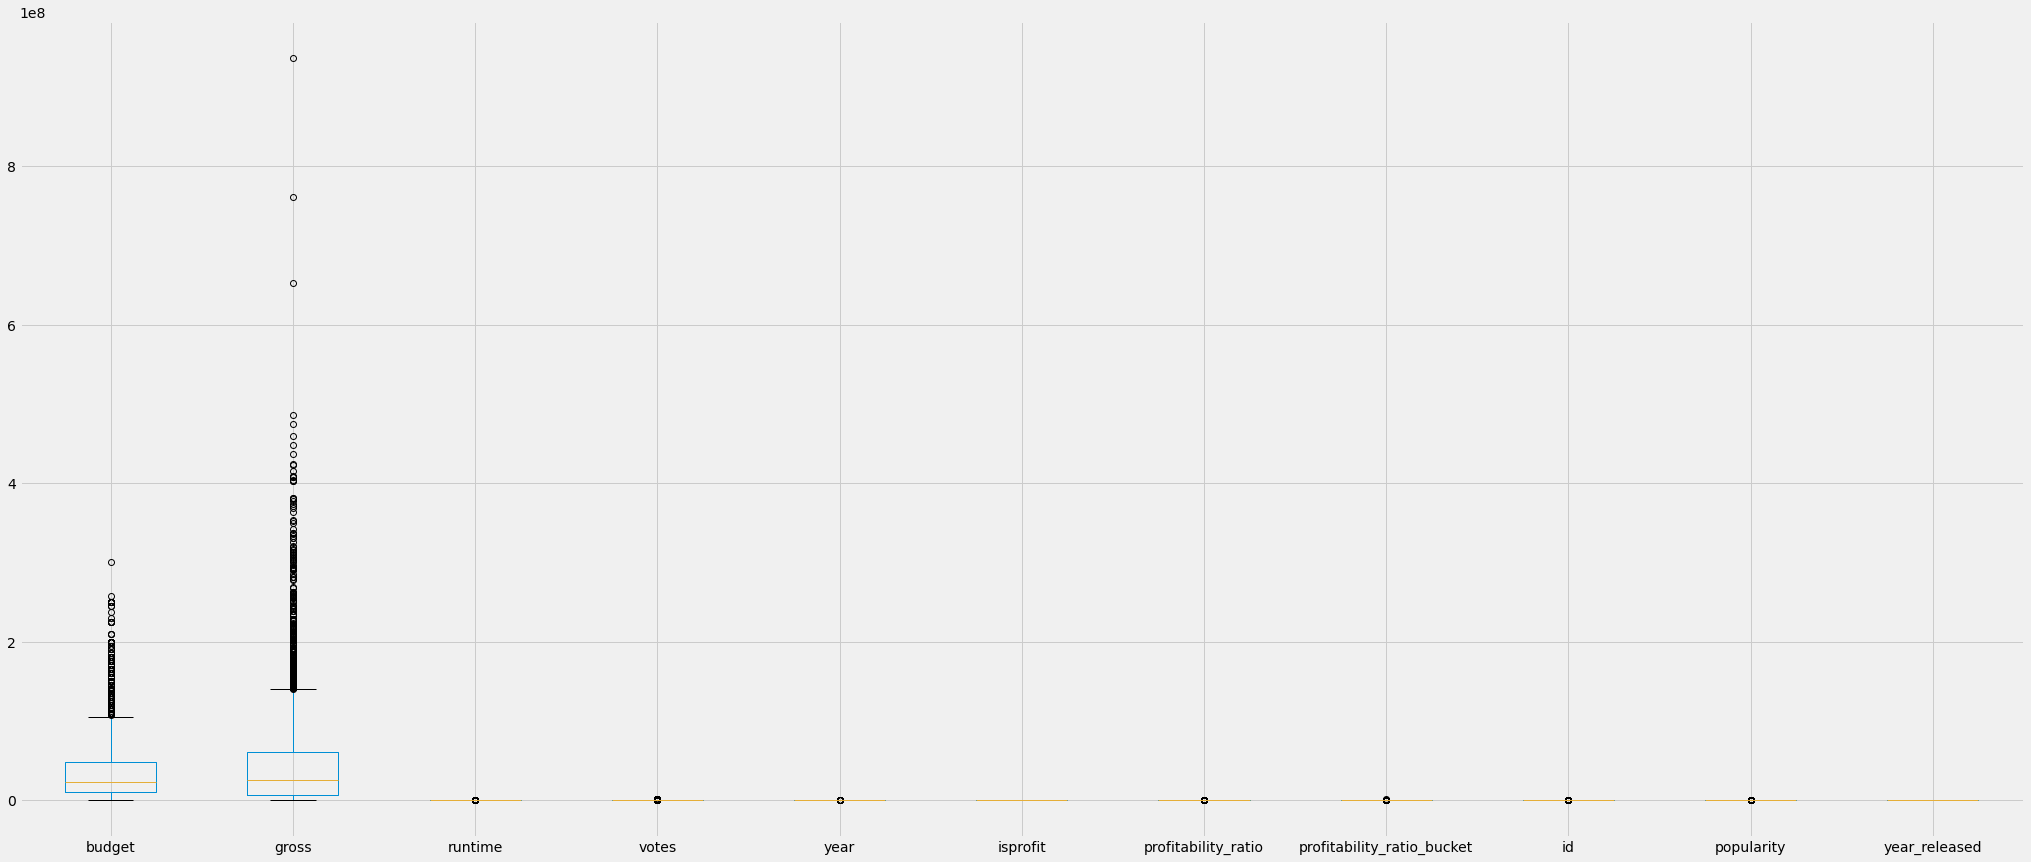

In [87]:
df.plot(x=df.index.name, kind='box', figsize=(32, 14))

Figure 2: Data Distribution before Cleaning
<p>Figure 2 shows the distribution of the data before dropping rows. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Data

<AxesSubplot:>

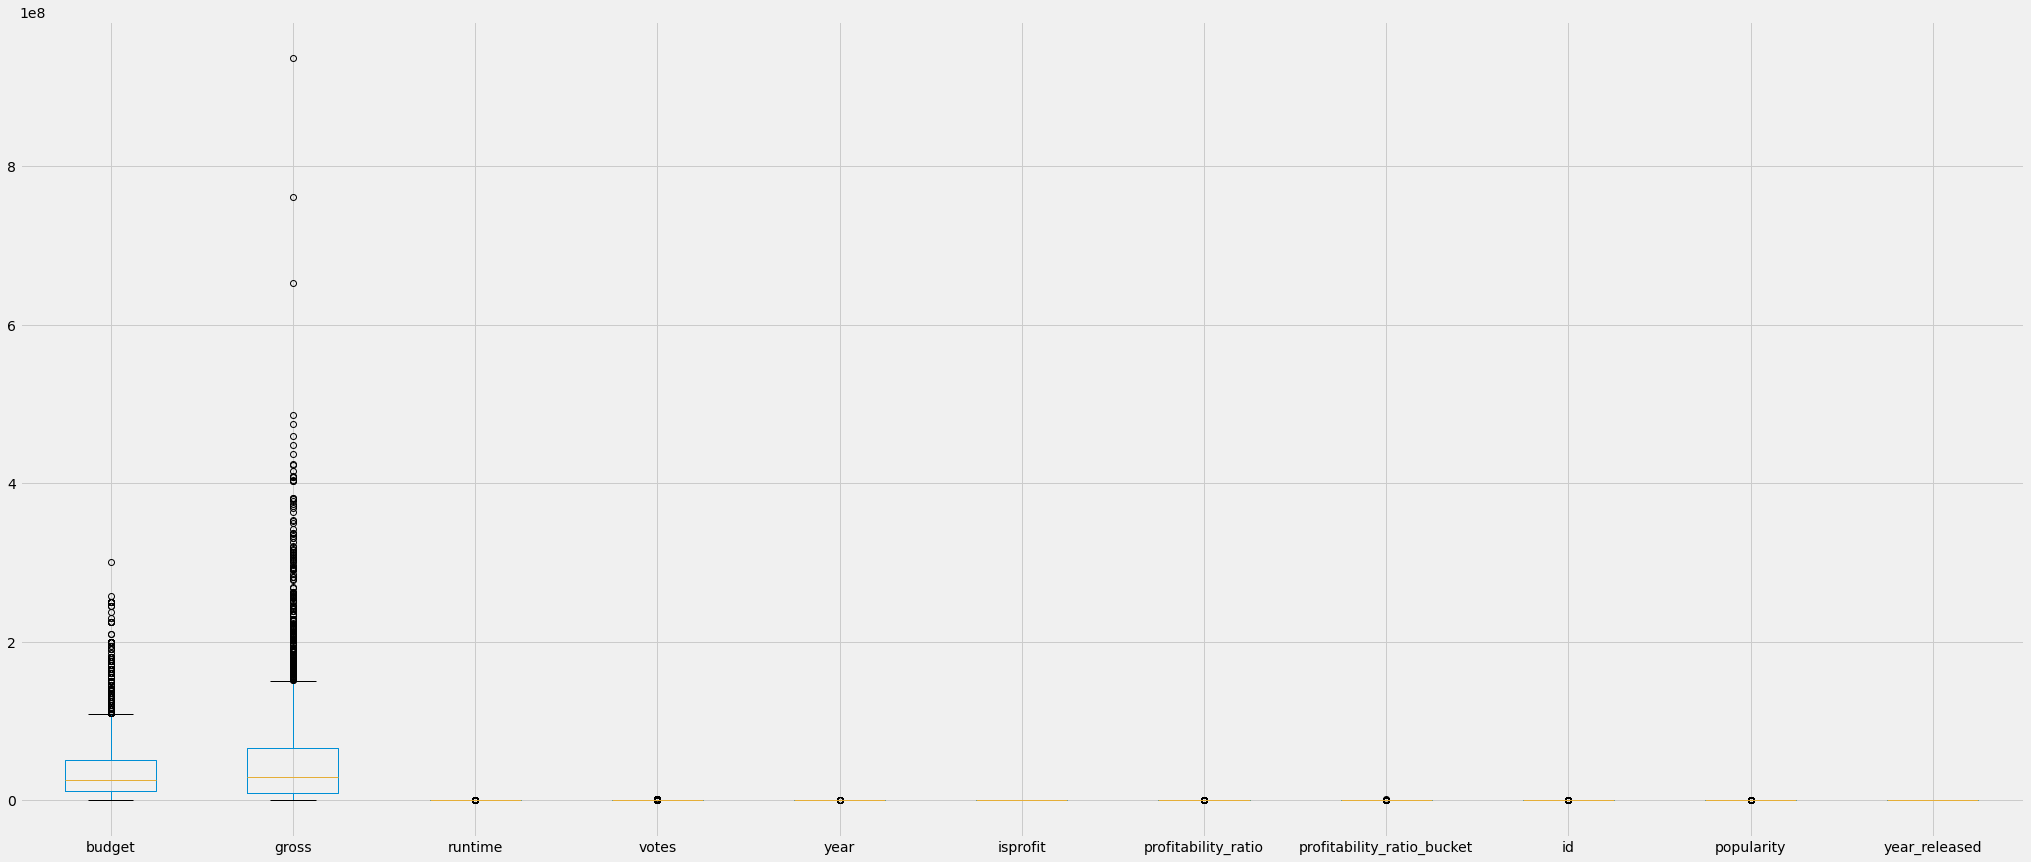

In [88]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 14))

Figure 3: Data Distribution of Dropped Data
<p>Figure 3 shows the distibution of data after dropping rows with the value NaN. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Outlier Data

<AxesSubplot:>

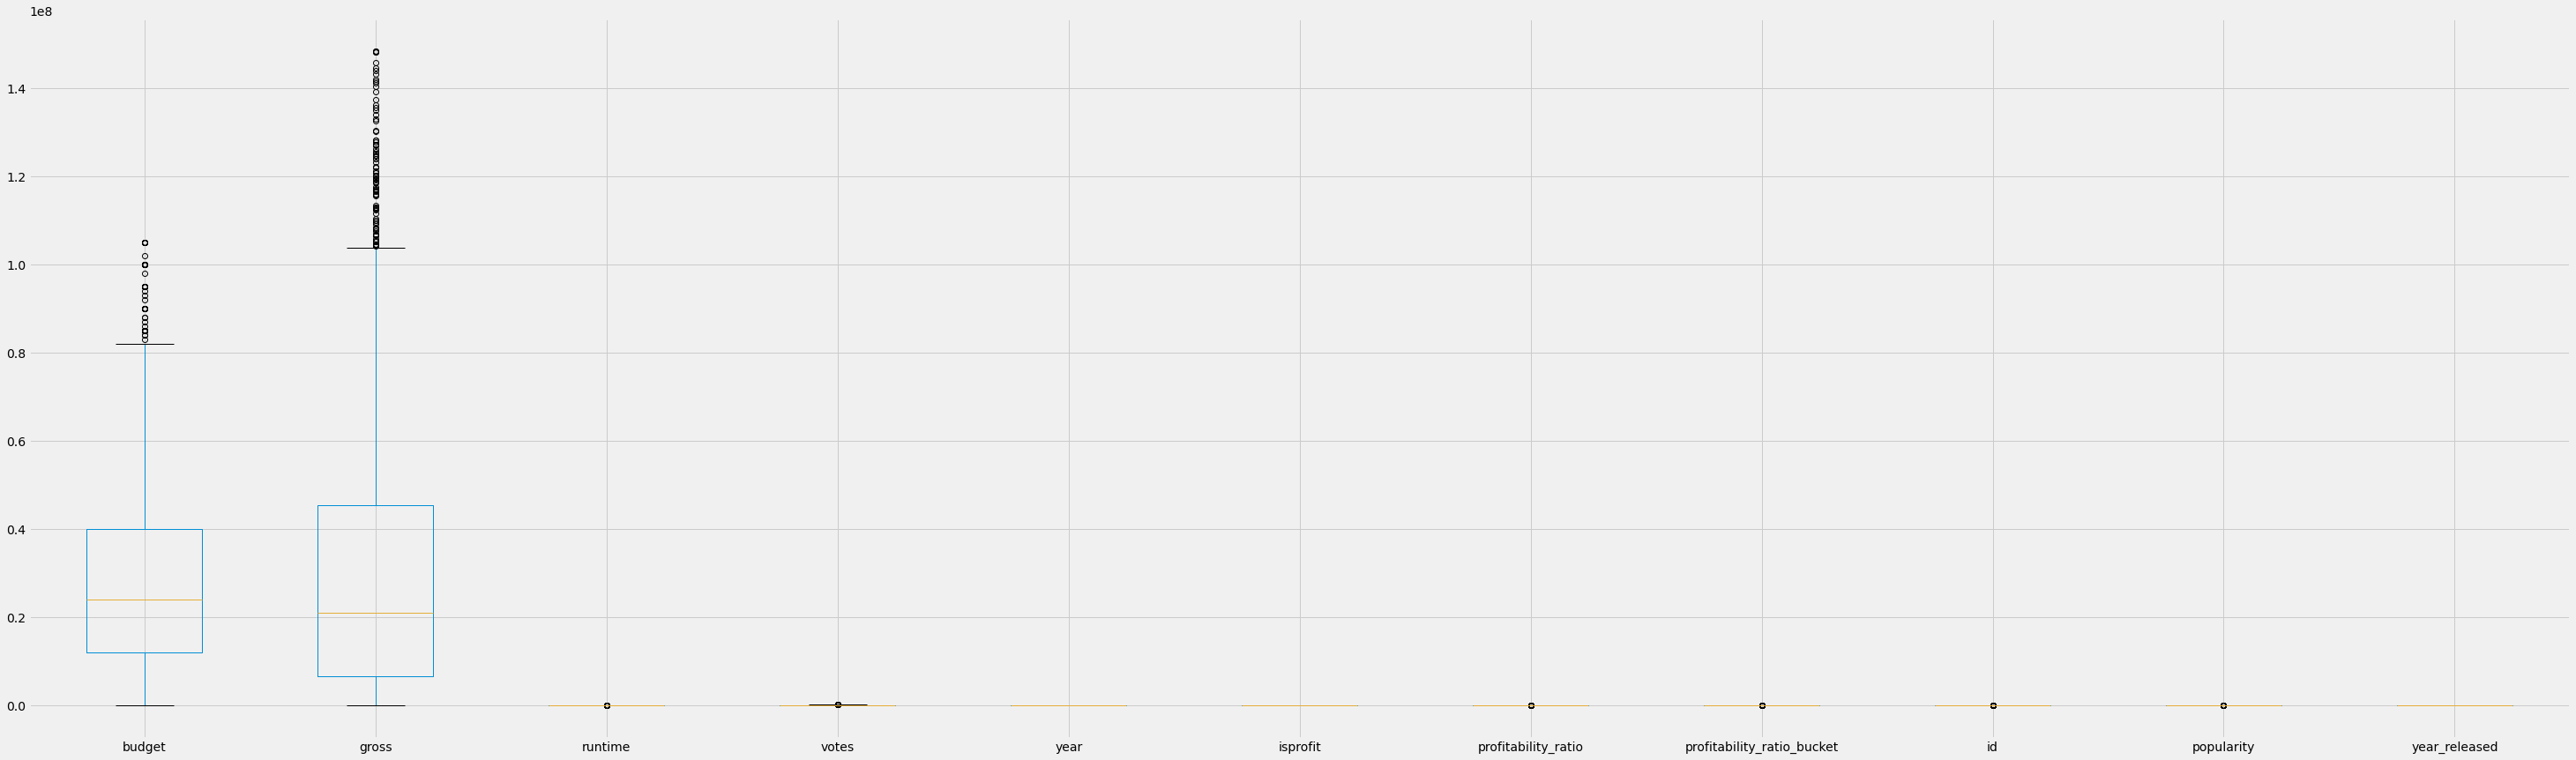

In [89]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(46, 14))

Figure 4: Data Distribution of Outlier Data
<p>Figure 4 shows the distributoion of data after dropping outliers. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

# 3. Data Transformation <a class="anchor" id="3"></a>

Our data has the following columns that we can perform transformation on:
* budget
* runtime
* score
* votes
* popularity

<p>
> We want to discretize and normalize the data so it will be ready for the modeling stage.
<br><br>
> After writing some general functions, we will perform the transformations one by one.
</p>

## 3.1. Binning <a class="anchor" id="31"></a>

Below, we iterate over all continuous features and use binning to discretize the data. At the end, we summarize the results by indicating the 4 intervals that our data was partitioned into.

In [90]:
for i in continuous_features:
    display(data_dropped_outlier_IQR[i].describe())

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4))

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4).value_counts())

count    2.128000e+03
mean     2.973382e+07
std      2.336575e+07
min      5.000000e+04
25%      1.200000e+07
50%      2.400000e+07
75%      4.000000e+07
max      1.050000e+08
Name: budget, dtype: float64

0         (49999.999, 12000000.0]
1         (49999.999, 12000000.0]
2        (12000000.0, 24000000.0]
3         (49999.999, 12000000.0]
4        (24000000.0, 40000000.0]
                  ...            
2123    (40000000.0, 105000000.0]
2124    (40000000.0, 105000000.0]
2125     (12000000.0, 24000000.0]
2126      (49999.999, 12000000.0]
2127     (24000000.0, 40000000.0]
Name: budget, Length: 2128, dtype: category
Categories (4, interval[float64]): [(49999.999, 12000000.0] < (12000000.0, 24000000.0] < (24000000.0, 40000000.0] < (40000000.0, 105000000.0]]

(49999.999, 12000000.0]      561
(24000000.0, 40000000.0]     529
(40000000.0, 105000000.0]    524
(12000000.0, 24000000.0]     514
Name: budget, dtype: int64

count    2128.000000
mean      104.856203
std        14.085340
min        69.000000
25%        95.000000
50%       102.000000
75%       114.000000
max       147.000000
Name: runtime, dtype: float64

0       (68.999, 95.0]
1       (114.0, 147.0]
2       (114.0, 147.0]
3        (95.0, 102.0]
4        (95.0, 102.0]
             ...      
2123    (68.999, 95.0]
2124     (95.0, 102.0]
2125    (114.0, 147.0]
2126    (102.0, 114.0]
2127    (102.0, 114.0]
Name: runtime, Length: 2128, dtype: category
Categories (4, interval[float64]): [(68.999, 95.0] < (95.0, 102.0] < (102.0, 114.0] < (114.0, 147.0]]

(68.999, 95.0]    561
(102.0, 114.0]    541
(95.0, 102.0]     518
(114.0, 147.0]    508
Name: runtime, dtype: int64

count      2128.000000
mean      57913.900846
std       60278.475392
min         704.000000
25%       14275.000000
50%       35855.500000
75%       80594.000000
max      286238.000000
Name: votes, dtype: float64

0        (35855.5, 80594.0]
1       (80594.0, 286238.0]
2       (80594.0, 286238.0]
3        (703.999, 14275.0]
4       (80594.0, 286238.0]
               ...         
2123    (80594.0, 286238.0]
2124     (35855.5, 80594.0]
2125    (80594.0, 286238.0]
2126     (35855.5, 80594.0]
2127     (14275.0, 35855.5]
Name: votes, Length: 2128, dtype: category
Categories (4, interval[float64]): [(703.999, 14275.0] < (14275.0, 35855.5] < (35855.5, 80594.0] < (80594.0, 286238.0]]

(703.999, 14275.0]     532
(14275.0, 35855.5]     532
(35855.5, 80594.0]     532
(80594.0, 286238.0]    532
Name: votes, dtype: int64

count    2128.000000
mean        7.986923
std         3.574890
min         0.000578
25%         5.535085
50%         7.758758
75%        10.393513
max        19.420510
Name: popularity, dtype: float64

0       (-0.00042200000000000007, 5.535]
1                        (7.759, 10.394]
2                       (10.394, 19.421]
3       (-0.00042200000000000007, 5.535]
4                       (10.394, 19.421]
                      ...               
2123                    (10.394, 19.421]
2124                    (10.394, 19.421]
2125                     (7.759, 10.394]
2126                      (5.535, 7.759]
2127                    (10.394, 19.421]
Name: popularity, Length: 2128, dtype: category
Categories (4, interval[float64]): [(-0.00042200000000000007, 5.535] < (5.535, 7.759] < (7.759, 10.394] < (10.394, 19.421]]

(-0.00042200000000000007, 5.535]    532
(5.535, 7.759]                      532
(7.759, 10.394]                     532
(10.394, 19.421]                    532
Name: popularity, dtype: int64

## 3.2. Normalization <a class="anchor" id="32"></a>

### 3.2.1. Z-score Method <a class="anchor" id="321"></a>

In [91]:
data_dropped_outlier_IQR[continuous_features].describe()

,budget,runtime,votes,popularity
count,2.128000e+03,2128.000000,2128.000000,2128.000000
mean,2.973382e+07,104.856203,57913.900846,7.986923
std,2.336575e+07,14.085340,60278.475392,3.574890
min,5.000000e+04,69.000000,704.000000,0.000578
25%,1.200000e+07,95.000000,14275.000000,5.535085
50%,2.400000e+07,102.000000,35855.500000,7.758758
75%,4.000000e+07,114.000000,80594.000000,10.393513
max,1.050000e+08,147.000000,286238.000000,19.420510


In [92]:
scaler = StandardScaler()

In [93]:
data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(data_dropped_outlier_IQR[continuous_features]), columns=continuous_features)

In [94]:
data_dropped_z_score_scaled.describe()

,budget,runtime,votes,popularity
count,2.128000e+03,2.128000e+03,2.128000e+03,2.128000e+03
mean,-2.671213e-17,-2.470872e-16,-2.671213e-17,1.602728e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-1.270698e+00,-2.546238e+00,-9.493164e-01,-2.234536e+00
25%,-7.591451e-01,-6.999135e-01,-7.241251e-01,-6.860109e-01
50%,-2.454520e-01,-2.028261e-01,-3.660276e-01,-6.383910e-02
75%,4.394720e-01,6.493238e-01,3.763438e-01,6.733509e-01
max,3.221976e+00,2.992736e+00,3.788712e+00,3.199056e+00


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'isprofit'}>],
       [<AxesSubplot:title={'center':'profitability_ratio'}>,
        <AxesSubplot:title={'center':'profitability_ratio_bucket'}>,
        <AxesSubplot:title={'center':'id'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year_released'}>, <AxesSubplot:>]],
      dtype=object)

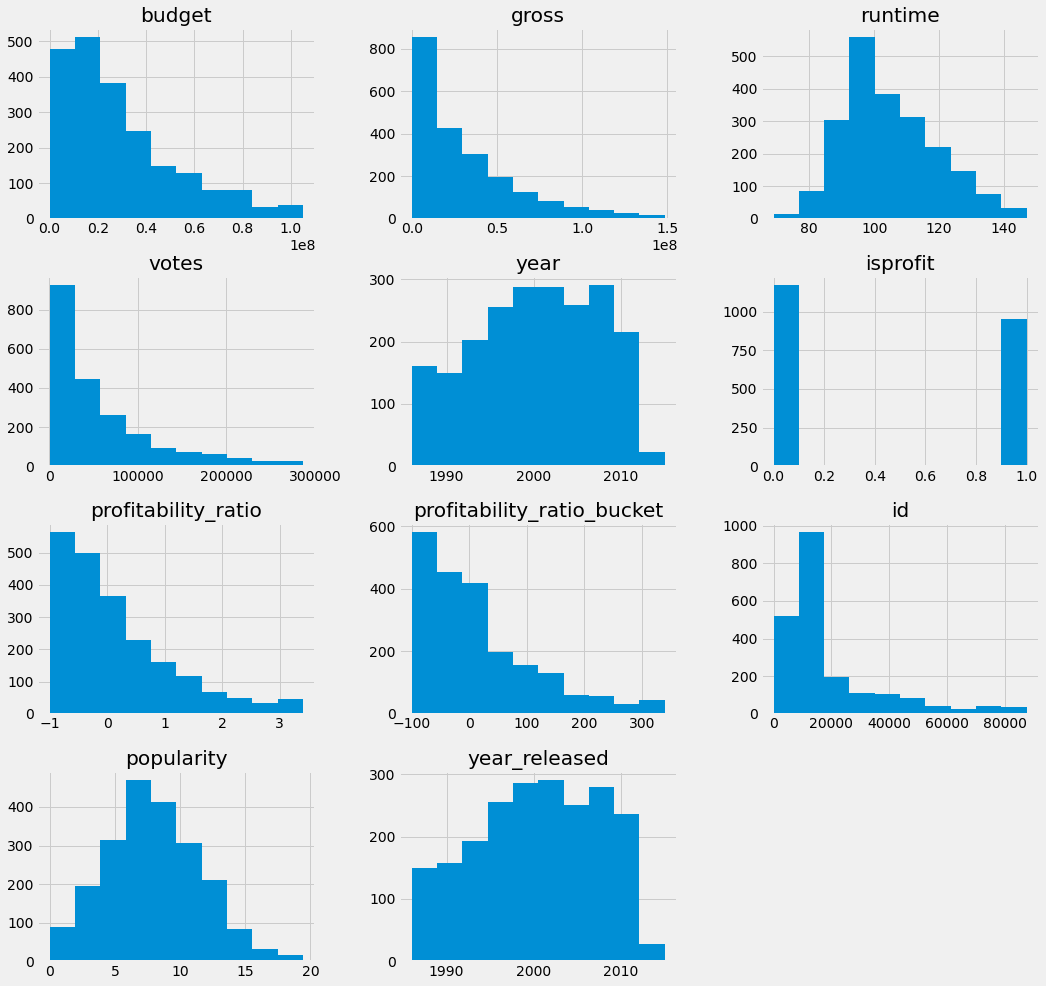

In [95]:
data_dropped_outlier_IQR.hist(figsize=(16, 16))

Figure 6: Histogram of Data Before Normalization
<p>Figure 6 shows the bar charts helping us visualize the data befor the five features above have been normalized.</p>

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'popularity'}>]], dtype=object)

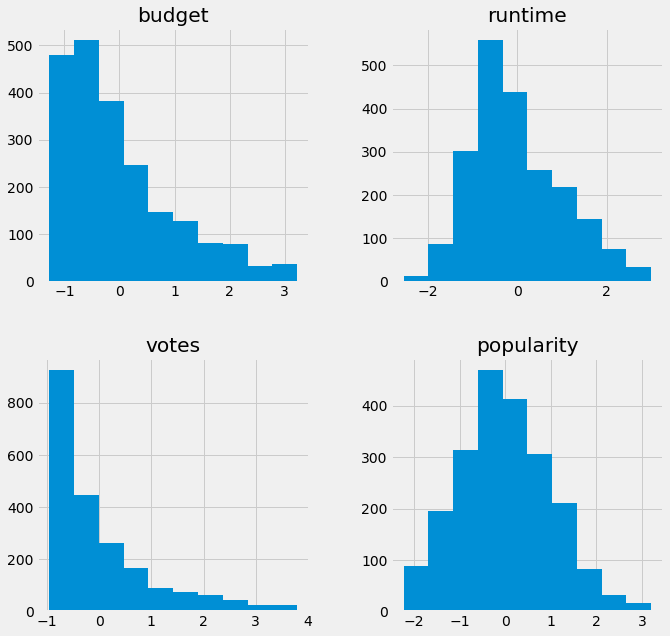

In [96]:
data_dropped_z_score_scaled.hist(figsize=(10, 10))

Figure 7: Histogram of Data After Normalization
<p>Figure 7 shows bar charts helping us visualize the data after the five features above have been normalized.</p>

Add normalized columns to main dataset as new columns labeled with the feature name they relate to followed by "_norm".

In [97]:
norm_column_names = ['budget_norm', 'runtime_norm', 'votes_norm', 'popularity_norm']
    
for i, j in zip(norm_column_names, continuous_features):
    data_dropped_outlier_IQR[i] = pd.Series(data_dropped_z_score_scaled[j])


In [98]:
data_dropped_outlier_IQR.to_csv('data/training_data.csv')

# 4. Results <a class="anchor" id="4"></a>

## 4.1. Data Cleaning <a class="anchor" id="41"></a>

As we analyze all the features in <a href="#21">Section 2.1.</a> we can see that the only features that need cleaning are overview, tagline, spoken_languages_edited, production_countries_edited and keywords_edited. The rest of the features are clean meaning not missing any values that require either dropping or replacement of those values.

## 4.2. Data Transformation <a class="anchor" id="42"></a>

After analyzing and cleaning the five categorical features found in <a href="#21">Section 2.1.</a> we are able to focus on transforming our data.  

<p>Our data includes categorical and continuous types but for transformation we want to focus on five that need to be discretized and normalized in order to be ready for modeling. These five features include budget, runtime, score, votes and popularity. The reason for discretizing the data is so we can partition the data into equal distributions that will be easier to manage and manipulate. After that we can use normalization to give all the attributes an equal weight which is useful to us in the following section where we model our data.</p>